In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 내용 읽기
with open('result_test.txt', 'r') as file:
    lines = file.readlines()

In [3]:
# 데이터를 저장할 리스트 초기화
d_values = []
weight_a_values = []
weight_b_values = []
weight_c_values = []
results = []

In [4]:
# 값을 추출하기 위한 정규 표현식
pattern = re.compile(r'd : (\d+), weight_a = (\d\.\d+), weight_b = (\d\.\d+), weight_c = (\d\.\d+), result = (\d+)')

In [5]:
# 각 줄에서 데이터 추출
for line in lines:
    match = pattern.search(line)
    if match:
        d_values.append(int(match.group(1)))
        weight_a_values.append(float(match.group(2)))
        weight_b_values.append(float(match.group(3)))
        weight_c_values.append(float(match.group(4)))
        results.append(int(match.group(5)))

# 데이터프레임 생성
df = pd.DataFrame({
    'd': d_values,
    'weight_a': weight_a_values,
    'weight_b': weight_b_values,
    'weight_c': weight_c_values,
    'result': results
})


In [6]:
df1 = df.sort_values(by = 'd').groupby(['weight_a','weight_b','weight_c']).get_group((0.15, 0.55, 0.3)).pivot_table(index = 'd', columns = ['weight_a','weight_b','weight_c'], values = 'result')
df2 = df.sort_values(by = 'd').groupby(['weight_a','weight_b','weight_c']).get_group((0.20, 0.5, 0.3)).pivot_table(index = 'd', columns = ['weight_a','weight_b','weight_c'], values = 'result')
df3 = df.sort_values(by = 'd').groupby(['weight_a','weight_b','weight_c']).get_group((0.20, 0.6, 0.2)).pivot_table(index = 'd', columns = ['weight_a','weight_b','weight_c'], values = 'result')
df4 = df.sort_values(by = 'd').groupby(['weight_a','weight_b','weight_c']).get_group((0.20, 0.7, 0.1)).pivot_table(index = 'd', columns = ['weight_a','weight_b','weight_c'], values = 'result')
df5 = df.sort_values(by = 'd').groupby(['weight_a','weight_b','weight_c']).get_group((0.25, 0.5, 0.25)).pivot_table(index = 'd', columns = ['weight_a','weight_b','weight_c'], values = 'result')
df6 = df.sort_values(by = 'd').groupby(['weight_a','weight_b','weight_c']).get_group((0.25, 0.6, 0.15)).pivot_table(index = 'd', columns = ['weight_a','weight_b','weight_c'], values = 'result')
df7 = df.sort_values(by = 'd').groupby(['weight_a','weight_b','weight_c']).get_group((0.25, 0.7, 0.05)).pivot_table(index = 'd', columns = ['weight_a','weight_b','weight_c'], values = 'result')


In [7]:
winners = pd.read_excel("draw_winners.xlsx", header = None)
wins = winners.iloc[:, 1]

In [8]:
wins.sum()

8983

C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\1802028944.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean: %f, var : %f'%(d.mean(), d.var()))
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\1802028944.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean: %f, var : %f'%(d.mean(), d.var()))
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\1802028944.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean: %f, var : %f'%(d.mean(), d.var()))
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\1802028944.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prin

mean: 12.489899, var : 14.159796
mean: 12.616915, var : 15.487512
mean: 12.371287, var : 18.960963
mean: 12.507389, var : 31.756133
mean: 12.651982, var : 16.750029
mean: 13.016461, var : 29.388158
mean: 12.673469, var : 39.253597


(0.0, 0.18)

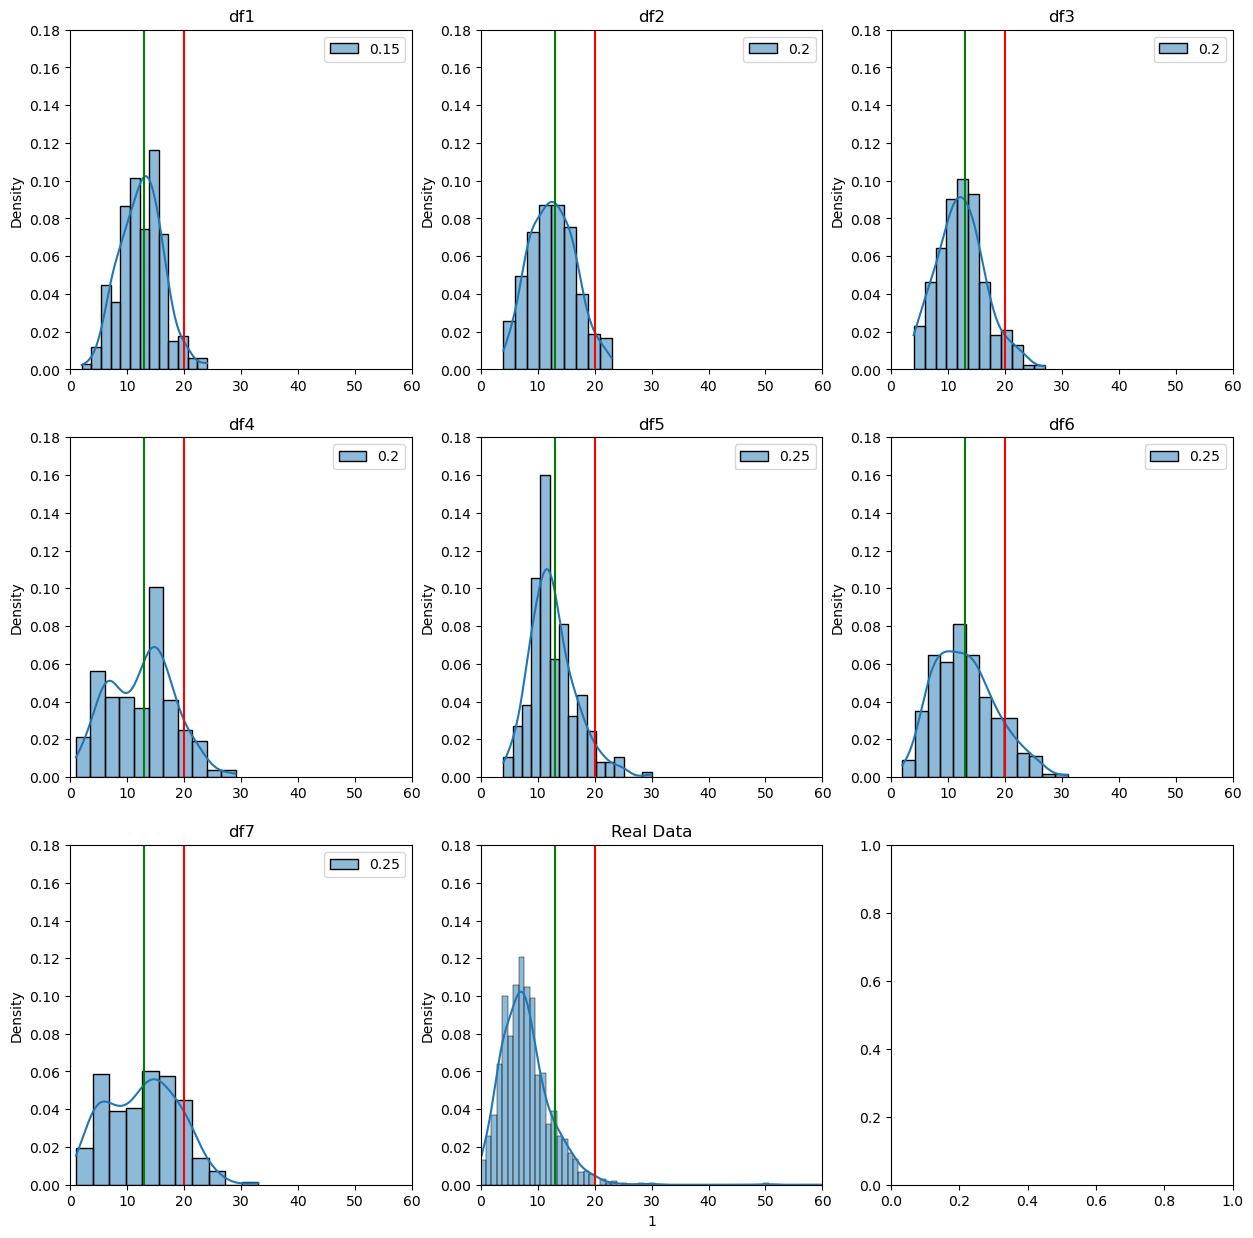

In [9]:
dfs = [df1, df2, df3, df4, df5, df6, df7]
fig, ax = plt.subplots(3, 3, figsize=(15, 15)) 
for i, d in enumerate(dfs):
    row = i//3
    col = i%3
    sns.histplot(d, kde=True, ax=ax[row, col], stat = 'density')  # 히스토그램과 KDE를 함께 그리기
    ax[row, col].set_title(f'df{i+1}')
    ax[row, col].axvline(20, color = 'red')
    ax[row, col].axvline(13, color = 'Green', label = 'Expected Frequency')
    ax[row, col].set_xlim(0,60)
    ax[row, col].set_ylim(0,0.18)
    print('mean: %f, var : %f'%(d.mean(), d.var()))

sns.histplot(wins, kde=True, ax=ax[2, 1], stat = 'density')
ax[2, 1].set_title('Real Data')
ax[2, 1].axvline(20, color = 'red')
ax[2, 1].axvline(13, color = 'Green', label = 'Expected Frequency')
ax[2, 1].set_xlim(0,60)
ax[2, 1].set_ylim(0,0.18)

In [10]:
import pandas as pd

# 텍스트를 여러 줄로 분리
text = '''
2018년 39,658
2017년 37,974
2016년 35,660
2015년 32,571
2014년 30,489
2013년 29,896
2012년 28,399
2011년 27,783
2010년 24,316
2009년 23,572
2008년 22,784
2007년 22,677
2006년 24,730
2005년 27,105
2004년 32,984
2003년 38,242
'''

# 텍스트를 줄 단위로 분리
lines = text.strip().split('\n')

# 각 줄을 탭을 기준으로 분리하고 데이터프레임 생성
data = [line.split() for line in lines]
df = pd.DataFrame(data, columns=['Year', 'Value'])

# Value 컬럼에서 쉼표 제거하고 정수형으로 변환
df['Value'] = df['Value'].str.replace(',', '').astype(int)

df.head()  # 데이터프레임 확인

sold = df

In [11]:
sold.Value = (sold.Value/52)*10
sold.iloc[15,1] = sold.iloc[15,1]/2
sold.iloc[14,1] = sold.iloc[14,1]/1.5

In [12]:
newsold = pd.DataFrame({
    'Year': ['2019년','2020년','2021년','2022년','2023년'],
    'Value': [8284,9056,9836,10411,10863]
})

In [13]:
sold_weight = pd.concat([sold, newsold]).sort_values(by = 'Year').reset_index(drop = True)
sold_weight.Value = sold_weight.Value/10000

In [14]:
sold_weight

,Year,Value
0,2003년,0.367712
1,2004년,0.422872
2,2005년,0.521250
3,2006년,0.475577
4,2007년,0.436096
5,2008년,0.438154
6,2009년,0.453308
7,2010년,0.467615
8,2011년,0.534288
9,2012년,0.546135


In [15]:
wins_adj = wins.reset_index()
wins_adj.columns = ['draw', 'wins']
wins_adj.draw = 1131 - wins_adj.draw


In [16]:
wins_adj = wins_adj.sort_values(by = 'draw').reset_index(drop = True)

In [17]:
draw_years = pd.DataFrame({
    'draw' : list(range(1,1132)),
    'Year' : ['2003년']*56 + ['2004년']*(52) + ['2005년']*(53)+
    ['2006년']*(52) + ['2007년']*52 + ['2008년']*52 + ['2009년']*52 + ['2010년']*52 +
    ['2011년']*53 + ['2012년']*52 + ['2013년']*52 + ['2014년']*52 + ['2015년']*52 + 
    ['2016년']*53 + ['2017년']*52 + ['2018년']*52 + ['2019년']*52 + ['2020년']*52 +
    ['2021년']*52 + ['2022년']*53 + ['2023년']*83
})

In [18]:
wins_weighted = pd.merge(pd.merge(wins_adj, draw_years, on = 'draw'), sold_weight, on ='Year')
wins_weighted['wins_adjusted'] = wins_weighted.wins / wins_weighted.Value

<Axes: xlabel='wins_adjusted', ylabel='Count'>

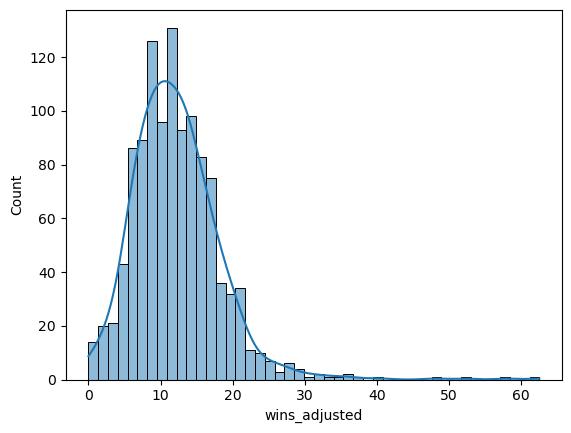

In [19]:
sns.histplot(wins_weighted.wins_adjusted, kde=  True)

C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\3335997784.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean: %f, var : %f'%(d.mean(), d.var()))
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\3335997784.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean: %f, var : %f'%(d.mean(), d.var()))
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\3335997784.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('mean: %f, var : %f'%(d.mean(), d.var()))
C:\Users\jmjwj\AppData\Local\Temp\ipykernel_20528\3335997784.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prin

mean: 12.489899, var : 14.159796
mean: 12.616915, var : 15.487512
mean: 12.371287, var : 18.960963
mean: 12.507389, var : 31.756133
mean: 12.651982, var : 16.750029
mean: 13.016461, var : 29.388158
mean: 12.673469, var : 39.253597


(0.0, 0.18)

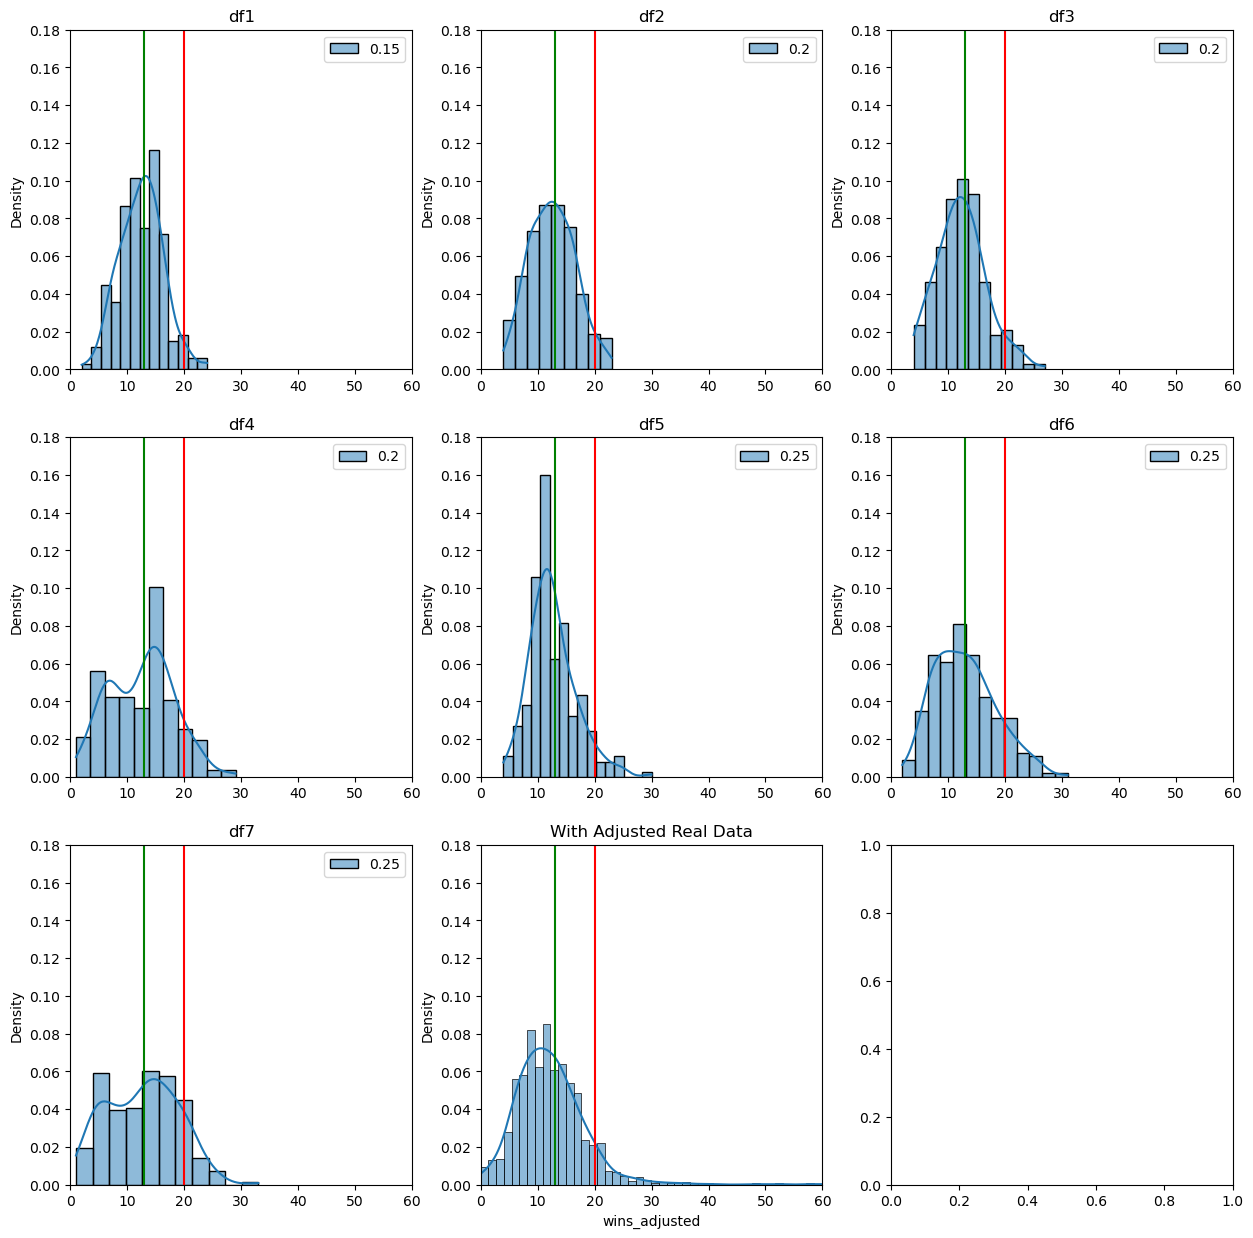

In [20]:
dfs = [df1, df2, df3, df4, df5, df6, df7]
fig, ax = plt.subplots(3, 3, figsize=(15, 15)) 
for i, d in enumerate(dfs):
    row = i//3
    col = i%3
    sns.histplot(d, kde=True, ax=ax[row, col], stat = 'density')  # 히스토그램과 KDE를 함께 그리기
    ax[row, col].set_title(f'df{i+1}')
    ax[row, col].axvline(20, color = 'red')
    ax[row, col].axvline(13, color = 'Green', label = 'Expected Frequency')
    ax[row, col].set_xlim(0,60)
    ax[row, col].set_ylim(0,0.18)
    print('mean: %f, var : %f'%(d.mean(), d.var()))


sns.histplot(wins_weighted.wins_adjusted, kde=True, ax=ax[2, 1], stat = 'density')
ax[2, 1].set_title('With Adjusted Real Data')
ax[2, 1].axvline(20, color = 'red')
ax[2, 1].axvline(13, color = 'Green', label = 'Expected Frequency')
ax[2, 1].set_xlim(0,60)
ax[2, 1].set_ylim(0,0.18)